In [6]:
import sys
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
sys.path.insert(0, 'C:/Users/MyPC/Desktop/git/AVATAR_motionMap')
import FileManager.csvload as acl
save_path = r'C:\Users\MyPC\Desktop\실험실\2.실험데이터\AVATAR-SDSBD'

df = pd.read_excel(r'C:\Users\MyPC\Desktop\실험실\2.실험데이터\AVATAR-SDSBD\AVATAR_SDSBD총정리.xlsx')
df['SIratio-postSD'] = pd.to_numeric(df['SIratio-postSD_chae'], errors='coerce')     # SIratio-postSD를 숫자로 변환 (문자열이 있으면 NaN으로 변환)
df = df.dropna(subset=['SIratio-postSD'])     # SIratio-postSD에 NaN이 있으면 해당 행 삭제
filtered_df = df[(df['group_for_aftersubtle_among_R_S'] != 'control') & (df['group_for_aftersubtle_among_R_S'] != 'X')]   # group_for_aftersubtle이 control이 아닌 행만 추출
my_dict = dict(zip(filtered_df['mouse_name'], filtered_df['SIratio-postSD']))
print(my_dict)

{102: 0.922203, 103: 0.881327, 106: 0.922504, 107: 0.657534, 108: 0.287469, 109: 1.345464, 111: 0.187187, 112: 1.550351, 113: 0.384673, 114: 0.30692, 115: 0.659213, 202: 0.911846, 203: 0.400973, 205: 1.072233, 212: 0.341958, 214: 0.24345, 215: 0.039135, 217: 1.188168, 218: 0.311278, 219: 0.302909, 301: 0.3013105560569491, 302: 0.8291034158181775, 303: 1.1633683233222483, 304: 0.9996324028764787, 305: 1.0199047644573094, 306: 1.0639706318793805, 307: 0.2346704871060172, 308: 1.1086557886557888, 309: 0.7710254981027433, 310: 0.16270030576569652, 311: 1.2242639312216665, 312: 0.8871441244863113, 313: 0.19346015351143012, 314: 0.8609548981025454, 315: 0.9557253209762014, 401: 1.1538760517117834, 402: 1.558215238457064, 404: 1.2795870771741111, 407: 1.0850197337357887, 408: 0.5140063527044347, 409: 1.3946922110129685, 411: 1.4511152231905715, 413: 1.2867773899244181, 414: 0.6245707937790347, 415: 1.0753725910193082, 416: 0.430005958612471, 417: 0.14553133333966048, 418: 0.8874184465580061, 

GMM에서 사용할 최적의 분포 개수 구하기

c:\Users\MyPC\anaconda3\envs\SUBTLE\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MyPC\anaconda3\envs\SUBTLE\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MyPC\anaconda3\envs\SUBTLE\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MyPC\anaconda3\envs\SUBTLE\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMe

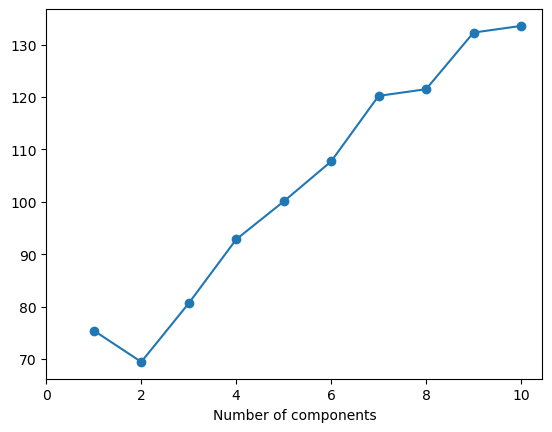

In [8]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = "1"     # OMP_NUM_THREADS를 1로 설정하여 병렬처리를 하지 않도록 함

si_ratios = list(my_dict.values())  # my_dict에서 SI ratio 값들을 추출
data = np.array(si_ratios).reshape(-1, 1)   # numpy 배열로 변환

# BIC를 계산하여 최적의 컴포넌트 수 찾기
max_components = 10
n_components = np.arange(1, max_components + 1)
bics = []
for n in n_components:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(data)
    bics.append(gmm.bic(data))

# BIC를 시각화하여 최적의 컴포넌트 수 확인
plt.plot(n_components, bics, marker='o')
plt.xlabel('Number of components')

# X축 틱 설정: 위치는 1 단위로, 표시되는 숫자는 2 단위로
plt.xticks(ticks=np.arange(0, max_components+1, 2), labels=np.arange(0, max_components+1, 2))
plt.savefig(os.path.join(save_path, 'BICforGMM.png'))  # 히스토그램 저장
plt.show()

GMM 실행

c:\Users\MyPC\anaconda3\envs\SUBTLE\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


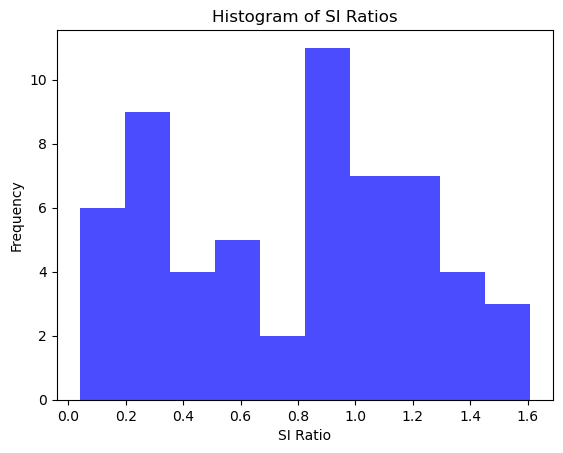

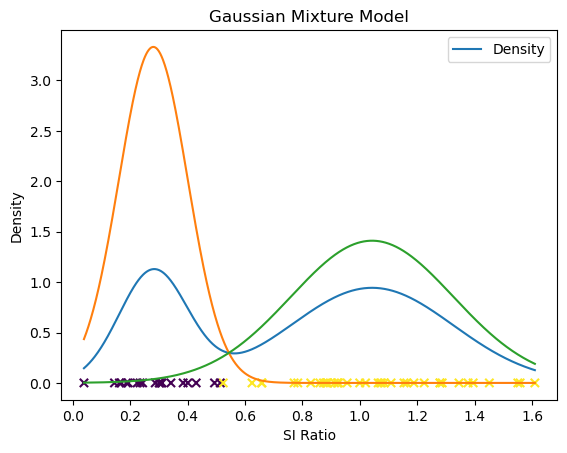

In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "1"     # OMP_NUM_THREADS를 1로 설정하여 병렬처리를 하지 않도록 함

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import norm

si_ratios = list(my_dict.values())  # my_dict에서 SI ratio 값들을 추출
data = np.array(si_ratios).reshape(-1, 1)   # numpy 배열로 변환

# GMM 모델 정의 및 학습
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# 각 데이터 포인트가 어느 분포에 속하는지 예측
labels = gmm.predict(data)

# SI ratio에 따른 히스토그램 생성 및 저장
plt.hist(data, bins=10, color='blue', alpha=0.7)
plt.title("Histogram of SI Ratios")
plt.xlabel("SI Ratio")
plt.ylabel("Frequency")
plt.savefig(os.path.join(save_path, 'histogram_si_ratio_among_R_S.png'))  # 히스토그램 저장
plt.show()


# 데이터 밀도 플롯
x = np.linspace(np.min(data), np.max(data), 1000)
densities = gmm.score_samples(x.reshape(-1, 1))

# 각 분포에 대한 평균과 분산
means = gmm.means_.flatten()
variances = gmm.covariances_.flatten()

# 결과 시각화
plt.scatter(data, np.zeros_like(data), c=labels, cmap='viridis', marker='x')
plt.plot(x, np.exp(densities), label='Density')
for mean, var in zip(means, variances):
    plt.plot(x, norm.pdf(x, mean, np.sqrt(var)))

plt.title("Gaussian Mixture Model")
plt.xlabel("SI Ratio")
plt.ylabel("Density")
plt.legend()
plt.savefig(os.path.join(save_path, 'GMM_results_among_R_S.png'))  # figure 저장
plt.show()

Text(0, 0.5, 'Density')

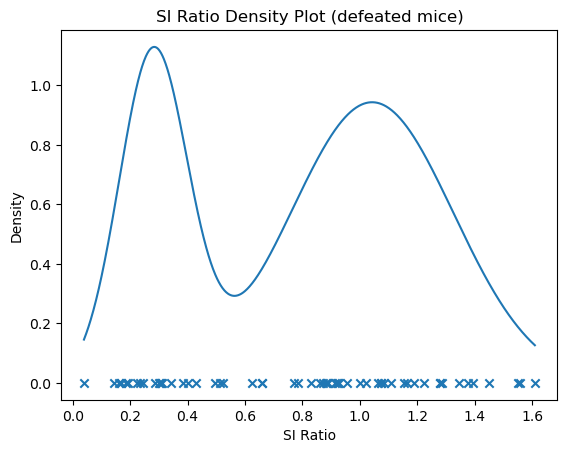

In [10]:
plt.scatter(data, np.zeros_like(data), marker='x')
plt.plot(x, np.exp(densities), label='Density')
plt.title("SI Ratio Density Plot (defeated mice)")
plt.xlabel("SI Ratio")
plt.ylabel("Density")

In [11]:
import pandas as pd

total_dict = {}
total_dict = my_dict.copy()  # my_dict를 total_dict에 복사

for i, mouse in enumerate(total_dict.keys()):
    si_ratio = total_dict[mouse]  # 현재 si_ratio 값을 저장
    total_dict[mouse] = {'si_ratio': si_ratio, 'label': labels[i]}
    
# total_dict를 pandas DataFrame으로 변환
df = pd.DataFrame.from_dict(total_dict, orient='index').reset_index()
df.columns = ['mouse_name', 'si_ratio', 'label']  # 컬럼 이름 설정

# Excel 파일 경로 설정
output_file = r'C:\Users\MyPC\Desktop\실험실\2.실험데이터\AVATAR-SDSBD\label_extremeS.xlsx'  # 원하는 경로와 파일명 입력

# Excel 파일로 저장
df.to_excel(output_file, index=False)

print("Excel 파일이 저장되었습니다:", output_file)


Excel 파일이 저장되었습니다: C:\Users\MyPC\Desktop\실험실\2.실험데이터\AVATAR-SDSBD\label_extremeS.xlsx


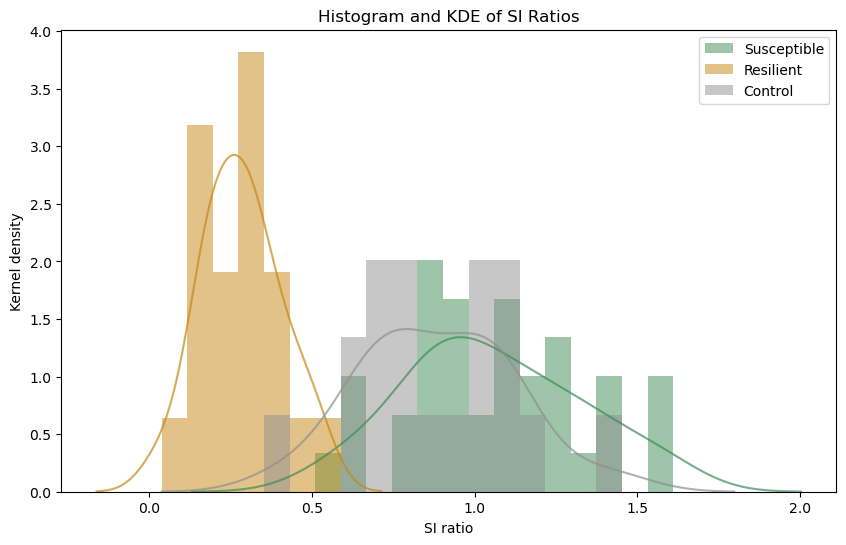

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Excel 파일 경로
file_path = r'C:\Users\MyPC\Desktop\실험실\2.실험데이터\AVATAR-SDSBD\label_extremeS_among_R_S.xlsx'
df = pd.read_excel(file_path)
# color map
color1 = (144/255, 144/255, 144/255)  # control group color code
color2 = (62/255, 140/255, 87/255)  # resilient color code
color3 = (238/255, 182/255, 76/255)  # susceptible color code
color4 = (199/255, 135/255, 19/255)  # susceptible_extreme color code
colors = [color2, color4, color1]  # color code list

bins = np.linspace(df['si_ratio'].min(), df['si_ratio'].max(), 15)  # 모든 데이터에 대한 공통 bin 경계 생성
label_names = {
    0: 'Resilient',
    1: 'Susceptible',
    2: 'Control'
}

###################################

# 'label'에 따른 고유한 값들 가져오기
labels = df['label'].unique()

# 모든 데이터에 대한 공통 bin 경계 생성
bins = np.linspace(df['si_ratio'].min(), df['si_ratio'].max(), 21)

# 히스토그램 설정
plt.figure(figsize=(10, 6))


# 각 'label' 값에 따라 히스토그램과 KDE 그리기
for i, label in enumerate(labels):
    subset = df[df['label'] == label]  # 현재 'label' 값에 해당하는 데이터만 선택
    # 히스토그램 그리기
    plt.hist(subset['si_ratio'], bins=bins, alpha=0.5, label=label_names.get(label, f'Label {label}'), color=colors[i % len(colors)], density=True)
    # KDE 그리기
    sns.kdeplot(subset['si_ratio'], color=colors[i % len(colors)], alpha=0.7)

# 범례 추가
plt.legend()

# 축 이름 추가
plt.xlabel('SI ratio')
plt.ylabel('Kernel density')

# 제목 추가
plt.title('Histogram and KDE of SI Ratios')

# 히스토그램 및 KDE 보여주기
plt.show()

C:\Temp\ipykernel_43496\3934614856.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='label', y='si_ratio', data=group_means, ci=None, palette=colors, edgecolor='k')


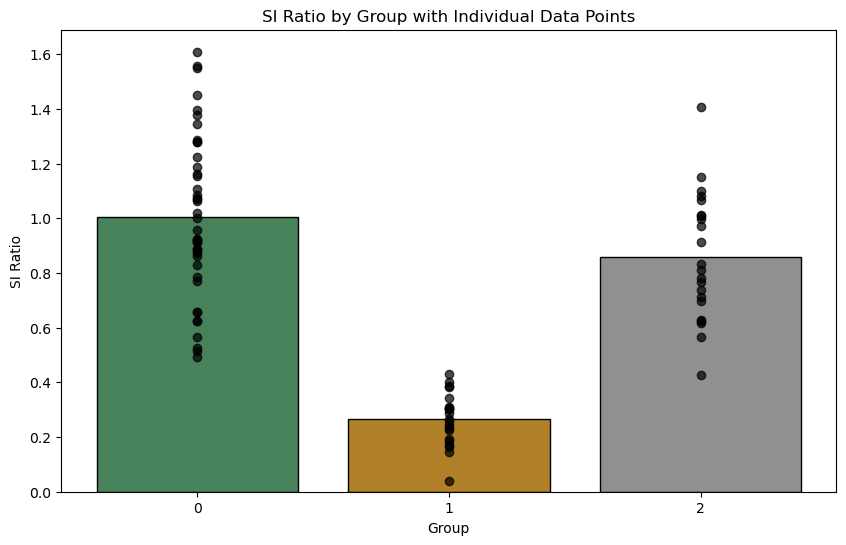

In [24]:
# 그룹별 si_ratio 평균 계산
group_means = df.groupby('label')['si_ratio'].mean().reset_index()

# 그룹별 si_ratio 평균 바 그래프 그리기
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='label', y='si_ratio', data=group_means, ci=None, palette=colors, edgecolor='k')

# 각 개체의 si_ratio를 점으로 표현
for i, group in enumerate(group_means['label']):
    # 현재 그룹에 속하는 개체들의 데이터 선택
    subset = df[df['label'] == group]
    # 개체별 si_ratio 점으로 표현
    plt.scatter([i] * len(subset), subset['si_ratio'], color='black', alpha=0.7, zorder=5)

# 범례 및 레이블 추가
#plt.xlabel('Group')
plt.ylabel('SI Ratio')
plt.title('SI Ratio by Group with Individual Data Points')

plt.show()
